In [1]:
import numpy as np
# import sympy as sp
from scipy import signal
from numpy import pi as π
import matplotlib.pyplot as plt
%matplotlib inline

![2nd order LP filter](./img/2n_order_LP_filter.png)

## Parámeters

$Q = 0.9$

$R = 8 \Omega$

$freq = 2kHz$

## Canonical equation Low Pass filter 2nd Order

$$H(s) = G \cdot \frac{\omega_0^2}{s² + \frac{ \omega_0}{Q} s + \omega_0²}$$

In [2]:
ω_0 = 2*π*2000; Q=0.9; G = 1

In [3]:
num = [ω_0**2]
den = [1, ω_0/Q, ω_0**2]
LP_filter = signal.lti(num,den)
LP_filter

TransferFunctionContinuous(
array([1.5791367e+08]),
array([1.0000000e+00, 1.3962634e+04, 1.5791367e+08]),
dt: None
)

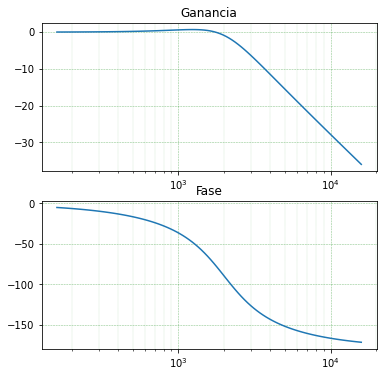

In [4]:
w, mag, phase = signal.bode(LP_filter)
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(6,6))
ax1.semilogx(w/2/π, mag) # Eje x logaritmo
ax2.semilogx(w/2/π, phase) # Eje x logaritmico

ax1.set_title('Ganancia') #Decoracion
ax2.set_title('Fase') # Decoracion

ax1.grid(color='g', linestyle='--', linewidth=0.5, alpha=0.5,which='major') #Decoracion
ax1.grid(color='g', linestyle='--', linewidth=0.2, alpha=0.5,which='minor') #Decoracion

ax2.grid(color='g', linestyle='--', linewidth=0.5, alpha=0.5,which='major') #Decoracion
ax2.grid(color='g', linestyle='--', linewidth=0.2, alpha=0.5,which='minor') #Decoracion

## ngspice response S-Parameter simulation

![ngspice_response](img/ngspice_S-parameters.png)

## Find "ideal" Componets

$Q = \omega_0 C R$ 

$\omega_0 = \frac{1}{\sqrt{LC}}$

In [5]:
R = 8; Q = 0.9;
C = Q/ω_0/R
C

8.952465548919114e-06

In [6]:
L=1/ω_0**2/C
L

0.0007073553026306459

## ngspice response "ideal" components simulation

![ngspice ideal components simulation](img/ngspice_ideal_components.png)